In [44]:
import pandas as pd
import numpy as np
import risk as rk
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
hfi = pd.read_csv(
    '/Users/chiemelienwanisobi/cloned_repos/QuantFinance/edhec-hedgefundindices.csv')

hfi.date = pd.to_datetime(hfi.date, format="%d/%m/%Y")
hfi.set_index("date", inplace=True)
hfi

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01-31,1.19,3.93,1.78,7.91,1.89,2.13,1.91,5.73,2.81,1.50,1.80,-1.66,3.17
1997-02-28,1.23,2.98,1.22,5.25,1.01,0.84,1.22,1.75,-0.06,0.34,1.18,4.26,1.06
1997-03-31,0.78,-0.21,-0.12,-1.20,0.16,-0.23,1.09,-1.19,-0.84,0.60,0.10,7.78,-0.77
1997-04-30,0.86,-1.70,0.30,1.19,1.19,-0.05,1.30,1.72,0.84,-0.01,1.22,-1.29,0.09
1997-05-31,1.56,-0.15,2.33,3.15,1.89,3.46,1.18,1.08,3.94,1.97,1.73,-7.37,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-31,0.21,-0.58,0.93,0.40,-0.10,0.55,0.22,-0.14,0.67,-0.21,0.45,-0.52,0.18
2018-08-31,0.24,1.66,0.02,-2.77,0.04,0.11,0.17,-0.07,0.35,0.50,-0.02,-2.14,0.15
2018-09-30,0.34,-0.54,0.50,-1.10,-0.16,0.32,0.36,0.06,-0.23,0.28,0.18,0.36,-0.22


In [9]:
hfi.date = pd.to_datetime(hfi.date)
hfi2 = hfi.iloc[:, 1:]
hfi2


,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
0,1.19,3.93,1.78,7.91,1.89,2.13,1.91,5.73,2.81,1.50,1.80,-1.66,3.17
1,1.23,2.98,1.22,5.25,1.01,0.84,1.22,1.75,-0.06,0.34,1.18,4.26,1.06
2,0.78,-0.21,-0.12,-1.20,0.16,-0.23,1.09,-1.19,-0.84,0.60,0.10,7.78,-0.77
3,0.86,-1.70,0.30,1.19,1.19,-0.05,1.30,1.72,0.84,-0.01,1.22,-1.29,0.09
4,1.56,-0.15,2.33,3.15,1.89,3.46,1.18,1.08,3.94,1.97,1.73,-7.37,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,0.21,-0.58,0.93,0.40,-0.10,0.55,0.22,-0.14,0.67,-0.21,0.45,-0.52,0.18
259,0.24,1.66,0.02,-2.77,0.04,0.11,0.17,-0.07,0.35,0.50,-0.02,-2.14,0.15
260,0.34,-0.54,0.50,-1.10,-0.16,0.32,0.36,0.06,-0.23,0.28,0.18,0.36,-0.22
261,-0.73,-3.14,-1.58,-3.15,-1.29,-2.57,-0.23,-0.96,-4.02,-0.80,-1.09,2.37,-2.69


## HISTORICAL VAR

In [14]:
np.percentile(hfi2, 5, axis=0)
def var_historic(r, perc = 5):
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_historic, perc = perc)
    elif isinstance(r, pd.Series):
        return np.percentile(r, perc)


var_historic(hfi2)

Convertible Arbitrage    -1.576
CTA Global               -3.169
Distressed Securities    -1.966
Emerging Markets         -4.247
Equity Market Neutral    -0.814
Event Driven             -2.535
Fixed Income Arbitrage   -0.787
Global Macro             -1.499
Long/Short Equity        -2.598
Merger Arbitrage         -1.047
Relative Value           -1.174
Short Selling            -6.783
Funds Of Funds           -2.047
dtype: float64

In [27]:
from scipy.stats import norm, skew, kurtosis

## GAUSIAN VAR

In [46]:
## Norm.ppf returns z-score of an alpha
## Norm.cdf returns the alpha of a z-score

z = norm.ppf(.05)
gvar = -(hfi2.mean() + z * hfi2.std(ddof = 0))
gvar

Convertible Arbitrage     2.169082
CTA Global                3.423512
Distressed Securities     2.103167
Emerging Markets          4.716437
Equity Market Neutral     0.884956
Event Driven              2.114377
Fixed Income Arbitrage    1.457877
Global Macro              1.876650
Long/Short Equity         2.639673
Merger Arbitrage          1.043547
Relative Value            1.306126
Short Selling             8.008618
Funds Of Funds            2.129236
dtype: float64

## MODIFIED GUASIAN

In [92]:
skew_hf2 = hfi2.aggregate(skew)
kurt_hf2 = hfi2.aggregate(kurtosis)+3
adj_alpha = z + (((1/6) * (z**2-1) * skew_hf2)) + ((1/24) * (z**3 - 3*z) * (kurt_hf2 - 3)) + ((1/36) * (2*z**3 - 5*z) * skew_hf2 ** 2)
# adj_alpha = z + (z**2 - 1) * skew_hf2/6 + (z**3 - 3*z) * (kurt_hf2 - 3)/24 - (2*z**3 - 5*z) * (skew_hf2**2)/36
pp = pd.concat([adj_alpha,hfi2.mean(), hfi2.std(ddof = 0)], axis = 1)
pp.columns = ['Z_adj', 'Mean', 'Std']
pp['cf_var'] = pp.apply(lambda x: -(x['Mean'] + x['Z_adj']* x['Std']), axis =1)
pp

# adj_alpha
# skew_hf2
# kurt_hf2


,Z_adj,Mean,Std,cf_var
Convertible Arbitrage,-2.116762,0.550837,1.653593,2.949427
CTA Global,-1.596995,0.407376,2.329015,3.312047
Distressed Securities,-1.947728,0.694601,1.700922,2.618332
Emerging Markets,-1.876038,0.625323,3.247559,5.467223
Equity Market Neutral,-2.046569,0.449810,0.811480,1.210940
Event Driven,-1.981086,0.634449,1.671168,2.676278
Fixed Income Arbitrage,-2.514845,0.436502,1.151700,2.459846
Global Macro,-1.328268,0.540304,1.469404,1.411458
Long/Short Equity,-1.727885,0.633080,1.989693,2.804881
Merger Arbitrage,-1.937012,0.535589,0.960047,1.324033


In [222]:
import random
array = np.random.normal(10, 0.1, 1000)
mean = array.mean()
variance = sum((array -mean)**2)/len(array)
std = np.sqrt(variance)
variance, std


(np.float64(0.010270175125320902), np.float64(0.10134187251734054))

In [226]:
z = sum(((array - mean)/std)**2)
z

np.float64(999.9999999999993)

In [227]:
z = (((array - mean)/std)**3).mean()
skew_ = ((array- mean)**3 ).mean()/array.std()**3
z, skew_

(np.float64(-0.13513355760955537), np.float64(-0.13513355760955542))

In [228]:
z = (((array - mean)/std)**4).mean() -3
kurt = ((array- mean)**4 ).mean()/array.std()**4 - 3 
z, kurt

(np.float64(0.4203849381710105), np.float64(0.42038493817101497))

In [229]:
kurtosis(array), skew(array)


(np.float64(0.42038493817101497), np.float64(-0.13513355760955542))

In [230]:
rk.cvar_historic(hfi2)

Convertible Arbitrage     3.655000
CTA Global                4.126429
Distressed Securities     3.642857
Emerging Markets          7.236429
Equity Market Neutral     1.687857
Event Driven              3.833571
Fixed Income Arbitrage    2.825714
Global Macro              2.062857
Long/Short Equity         4.194286
Merger Arbitrage          1.914286
Relative Value            2.465000
Short Selling             9.682143
Funds Of Funds            3.320714
dtype: float64

## EFFICIENT FRONTIER

In [92]:
ind = pd.read_csv('./data/ind30_m_vw_rets.csv', header = 0, index_col = 0, parse_dates = True)/100
ind.index = pd.to_datetime(ind.index, format = "%Y%m")
ind.columns = ind.columns.str.strip()
ind.columns

/var/folders/j0/80hkbygd4lb27h9mw76gqzpw0000gn/T/ipykernel_9689/1585050983.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ind = pd.read_csv('./data/ind30_m_vw_rets.csv', header = 0, index_col = 0, parse_dates = True)/100


Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

<Axes: >

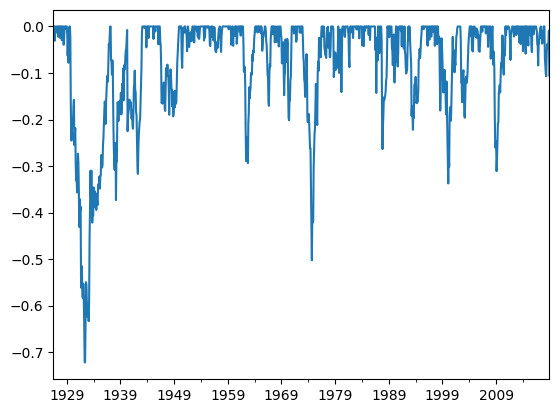

In [96]:
rk.drawdown(ind['Food'])['Drawdown'].plot.line()

<Axes: title={'center': 'Sharpe Ratios of 30 Industries'}>

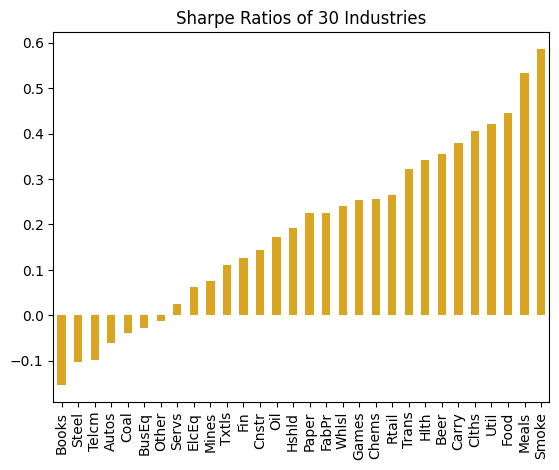

In [103]:
rk.sharpe_ratio(ind["2000":], 0.03, 12).sort_values().plot.bar(title = 'Sharpe Ratios of 30 Industries', color = 'goldenrod')

<Axes: title={'center': 'Annualized Returns of 30 Industries'}>

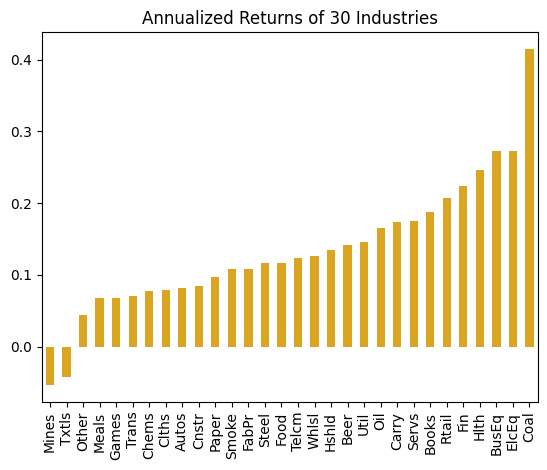

In [179]:
er = rk.annualize_rets(ind["1996":"2000"], 12)
er.sort_values().plot.bar(title = 'Annualized Returns of 30 Industries', color = 'goldenrod')

In [181]:
cov = ind["1996":"2000"].cov()
cov

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002609,0.002379,0.002061,0.000846,0.001035,0.001374,0.001733,0.001230,0.001414,0.001216,...,0.000667,0.000237,-0.000315,0.001429,0.001534,0.000740,0.001363,0.001230,0.002132,0.001057
Beer,0.002379,0.005264,0.001359,0.001348,0.000865,0.002804,0.001704,0.001955,0.001460,0.002005,...,0.001146,0.000438,0.000007,0.001710,0.002284,0.000697,0.001690,0.001822,0.002571,0.001383
Smoke,0.002061,0.001359,0.008349,0.000379,-0.000128,0.001167,0.000950,0.001038,0.000853,0.000779,...,0.000062,-0.000218,-0.000120,0.001327,0.000396,0.001707,0.000105,0.000703,0.001312,0.001741
Games,0.000846,0.001348,0.000379,0.003773,0.001726,0.001206,0.002189,0.001433,0.001775,0.001422,...,0.001922,0.002848,0.003434,0.001852,0.001578,0.001966,0.001872,0.001561,0.002416,0.002382
Books,0.001035,0.000865,-0.000128,0.001726,0.002612,0.001025,0.002361,0.000758,0.001731,0.001459,...,0.001918,0.002367,0.001944,0.001638,0.001776,0.001392,0.002223,0.001189,0.002261,0.001442
Hshld,0.001374,0.002804,0.001167,0.001206,0.001025,0.003300,0.001320,0.001473,0.001413,0.001364,...,0.001060,0.001310,0.001102,0.001873,0.001582,0.000683,0.001378,0.001202,0.001912,0.001580
Clths,0.001733,0.001704,0.000950,0.002189,0.002361,0.001320,0.005655,0.000834,0.002932,0.002472,...,0.001436,0.001625,0.000834,0.003165,0.002862,0.001934,0.003013,0.002721,0.003210,0.002299
Hlth,0.001230,0.001955,0.001038,0.001433,0.000758,0.001473,0.000834,0.002565,0.000474,0.000608,...,0.001204,0.001651,0.001535,0.000650,0.000944,0.001056,0.000869,0.000986,0.001617,0.001258
Chems,0.001414,0.001460,0.000853,0.001775,0.001731,0.001413,0.002932,0.000474,0.003276,0.001868,...,0.001004,0.001203,0.001031,0.002920,0.002196,0.001404,0.001808,0.001646,0.002469,0.002059
Txtls,0.001216,0.002005,0.000779,0.001422,0.001459,0.001364,0.002472,0.000608,0.001868,0.003117,...,0.000907,0.000666,0.000702,0.002058,0.001929,0.001610,0.001805,0.001250,0.001986,0.001811


In [118]:
def portfolio_return(weights, returns):
    """
    Weights -> Returns
    """
    return weights.T @ returns

def portfolio_vol(weights, covmat):
    """
    Weights -> Vol
    """
    return (weights.T @ covmat @ weights)**0.5

In [119]:
l = ["Food", "Beer", "Smoke", "Coal"]
er[l]
cov.loc[l,l]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [120]:
weights = np.repeat(1/4, 4)
rk.portfolio_return(weights, er[l])


0.19511097196038385

## Asset Frontier

<Axes: xlabel='Vol', ylabel='R'>

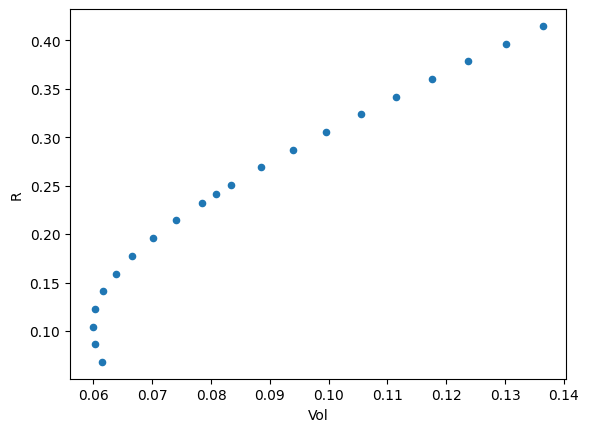

In [251]:
l = ["Games", "Coal" ]
n_points = 20
weights = [np.array([w, 1-w]) for w in np.linspace(0,1, n_points)]
weights.append(np.array([0.5, 0.5]))
rets = [rk.portfolio_return(w, er[l]) for w in weights]
vols = [rk.portfolio_vol(w, cov.loc[l,l]) for w in weights]
ef = pd.DataFrame({"R": rets, "Vol": vols})
ef.plot.scatter(x = "Vol", y = "R")

<Axes: xlabel='Volatility'>

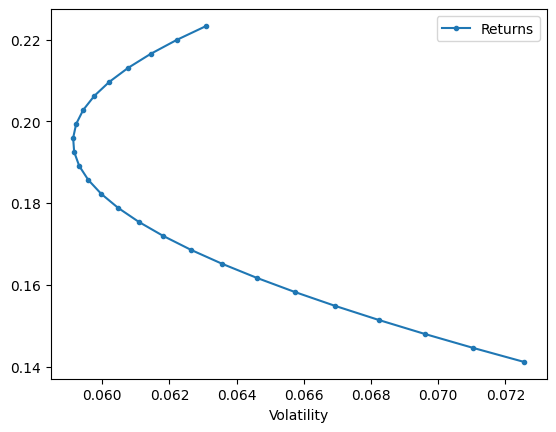

In [140]:
l = ['Fin', 'Beer']
rk.plot_ef2(25, er[l], cov.loc[l,l])

<Axes: xlabel='Volatility'>

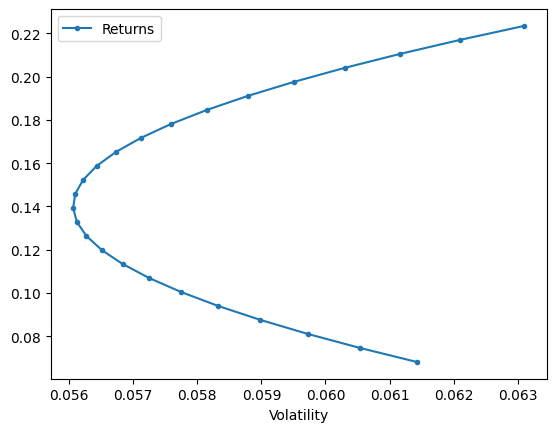

In [143]:
from scipy.optimize import minimize

l = ['Games', 'Fin']
rk.plot_ef2(25, er[l], cov.loc[l,l])

In [248]:
from scipy.optimize import minimize
def minimize_vol(target_return, er, cov):
    """
    target_return -> W
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n ## an n-tuple of 2-tuples, the comma ensures it is a tuple. It bounds x0 in the minimize function
    return_is_target = {
        'type': 'eq', ## Type of constraint
        'args': (er,),
        'fun': lambda weights, er: (target_return - rk.portfolio_return(weights, er)) ## Constraint function to evaluate
    } ## Minimize contstraint function to 0
    weights_sum_to_1 = {
        'type': 'eq',
        'fun': lambda weights: np.sum(weights) - 1
    }

    results = minimize(rk.portfolio_vol, x0 = init_guess,
                       args=(cov,), method = 'SLSQP',
                       options = {'disp': False},
                       constraints = (return_is_target, weights_sum_to_1),
                       bounds = bounds)
    
    ## args is a tuple of arguments to pass to the function to be minimized
    return results.x


def optimal_weights(n_points, er, cov):
    """
    -> list of weights to run the optimizer
    """

    target_rs = np.linspace(er.min(), er.max(), n_points)
    weights = [minimize_vol(target_return, er, cov) for target_return in target_rs] 

    ## Basically, loop through the target returns and find the optimal weights
    return weights

def gmv(cov):
    """
    Returns the weights of the Global Minimum Volatility Portfolio
    """
    n = cov.shape[0]
    return rk.msr(0, np.repeat(10,n), cov)

In [249]:
gmv(cov.loc[l,l])

array([0.89888869, 0.10111131])

In [211]:
def msr(riskfree_rate, er, cov):
    """
    Maximize Sharpe Ratio
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n ## an n-tuple of 2-tuples, the comma ensures it is a tuple. It bounds x0 in the minimize function
    weights_sum_to_1 = {
        'type': 'eq',
        'fun': lambda weights: np.sum(weights) - 1
    } ## Minimize contstraint function to 0. Ensuring weights sum to 1

    def neg_sharpe_ratio(weights, er, cov, riskfree_rate):
        """
        Returns the negative of the sharpe ratio, given weights
        """
        r = rk.portfolio_return(weights, er)
        vol = rk.portfolio_vol(weights, cov)
        return -(r - riskfree_rate)/vol

    results = minimize(neg_sharpe_ratio, x0 = init_guess,
                       args=(er,cov,riskfree_rate,), method = 'SLSQP',
                       options = {'disp': False},
                       constraints = ( weights_sum_to_1),
                       bounds = bounds)
    
    ## args is a tuple of arguments to pass to the function to be minimized
    return results.x

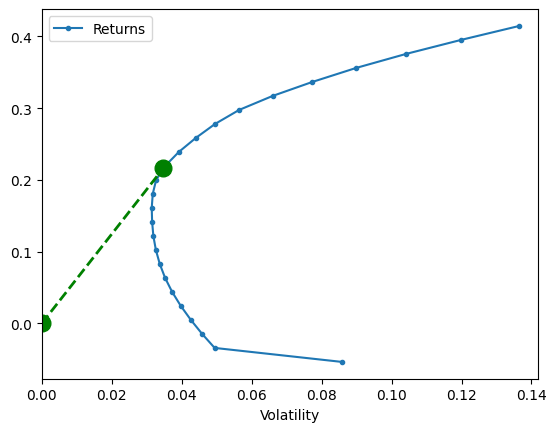

In [227]:
# rk.minimize_vol(0.15, er[l], cov.loc[l,l])
l = ["Smoke", "Fin", "Beer", "Coal"]

# rk.portfolio_vol(minimize_vol(0.15, er[l], cov.loc[l,l]), cov.loc[l,l])
ax = rk.plot_ef(25, er, cov, show_cml=True, riskfree_rate=0.00)
# ax.set_xlim(left = 0)
# rf = 0.1
# w_msr = msr(rf, er, cov)
# r_msr = rk.portfolio_return(w_msr, er)
# vol_msr = rk.portfolio_vol(w_msr, cov)

# # Add CML (Capital Market Line)
# cml_x = [0, vol_msr]
# cml_y = [rf, r_msr]

# ##
# ax.plot(cml_x, cml_y, color = 'green', marker = 'o', linestyle = 'dashed')


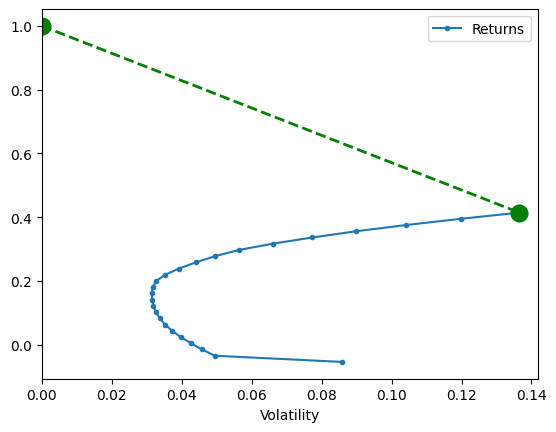

In [226]:
ax = rk.plot_ef(25, er, cov, show_cml=True, riskfree_rate=1)

In [228]:
msr(0.001, er[l], cov.loc[l,l]).round(4)

array([0.1179, 0.6376, 0.    , 0.2446])

## LACK OF ROBUSTNESS OF THE MARKOWITZ PROCEDURE, AND GMV

In [230]:
l = ["Food", "Steel"]
rk.msr(0.1, er[l], cov.loc[l,l])

array([0.75040362, 0.24959638])

<Axes: xlabel='Vol', ylabel='R'>

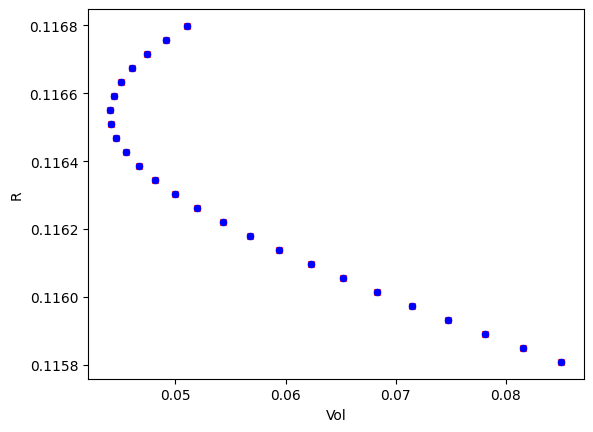

In [275]:
l = ["Food", "Steel"]
n_points = 25
random_weights = [np.array([w, 1-w]) for w in np.linspace(0,1, n_points)]
random_r, random_vol = [rk.portfolio_return(w, er[l]) for w in random_weights], [rk.portfolio_vol(w, cov.loc[l,l]) for w in random_weights]
l_weights = rk.optimal_weights(n_points, er[l], cov.loc[l,l])
l_returns, l_vol = zip(*[(rk.portfolio_return(w, er[l]), rk.portfolio_vol(w, cov.loc[l,l])) for w in l_weights])
random_df = pd.DataFrame({"R": random_r, "Vol": random_vol})
l_df = pd.DataFrame({"R": l_returns, "Vol": l_vol})
ax = random_df.plot.scatter(x = "Vol", y = "R", color = 'red', marker = 'x')
l_df.plot.scatter(x = "Vol", y = "R", ax = ax, color = 'blue', marker = 'o')

In [269]:
l_df.sort_values(by = 'Vol')    

,R,Vol
0,0.115809,0.085032
1,0.115861,0.080645
2,0.115913,0.076358
3,0.115965,0.072188
4,0.116017,0.068158
5,0.116069,0.064293
6,0.116121,0.060626
7,0.116173,0.057193
8,0.116225,0.054040
9,0.116278,0.051219


In [273]:
[portfolio_return(wer, er[l]) for wer in l_weights]

[0.11580856100299175,
 0.11586067190785544,
 0.11591278309194612,
 0.11596489427603683,
 0.11601700546012753,
 0.11606911664421823,
 0.11612122782830891,
 0.11617333901239962,
 0.11622545019649032,
 0.11627756138058101,
 0.11632967256467172,
 0.1163817837487624,
 0.11643389493285311,
 0.11648600611694382,
 0.11653811730103451,
 0.11659022848512522,
 0.1166423396692159,
 0.11669445085330661,
 0.1167465620373973,
 0.11679867294226098]

In [ ]:
er

In [243]:
rk.msr(0.1, np.array([0.5, 0.5]), cov.loc[l,l])

array([0.73822433, 0.26177567])

[array([0., 1.]), array([0.0417, 0.9583]), array([0.0833, 0.9167]), array([0.125, 0.875]), array([0.1667, 0.8333]), array([0.2083, 0.7917]), array([0.25, 0.75]), array([0.2917, 0.7083]), array([0.3333, 0.6667]), array([0.375, 0.625]), array([0.4167, 0.5833]), array([0.4583, 0.5417]), array([0.5, 0.5]), array([0.5417, 0.4583]), array([0.5833, 0.4167]), array([0.625, 0.375]), array([0.6667, 0.3333]), array([0.7083, 0.2917]), array([0.75, 0.25]), array([0.7917, 0.2083]), array([0.8333, 0.1667]), array([0.875, 0.125]), array([0.9167, 0.0833]), array([0.9583, 0.0417]), array([1., 0.])] 
 [0.1158, 0.1158, 0.1159, 0.1159, 0.116, 0.116, 0.1161, 0.1161, 0.1161, 0.1162, 0.1162, 0.1163, 0.1163, 0.1163, 0.1164, 0.1164, 0.1165, 0.1165, 0.1166, 0.1166, 0.1166, 0.1167, 0.1167, 0.1168, 0.1168] 
 [0.085, 0.0816, 0.0781, 0.0748, 0.0715, 0.0683, 0.0652, 0.0623, 0.0595, 0.0568, 0.0543, 0.052, 0.05, 0.0482, 0.0467, 0.0455, 0.0447, 0.0442, 0.0441, 0.0444, 0.0451, 0.0461, 0.0475, 0.0491, 0.0511]


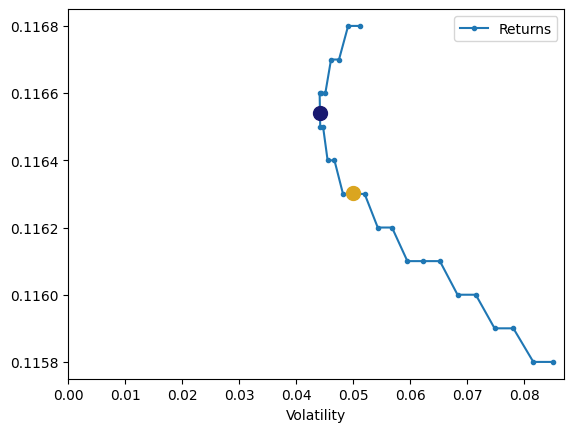

In [282]:
ax = rk.plot_ef(25, er[l], cov.loc[l,l], show_cml=False, riskfree_rate=0.1150, show_ew=True, show_gmv=True)
# weights = rk.optimal_weights(20, er[l], cov.loc[l,l])
# weights